Arshjot Singh
 (102103205)

3CO7

Sampling

problem 1

In [18]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [19]:
data = pd.read_csv("/content/Creditcard_data.csv",sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
columns = data.columns.tolist()

target = "Class"

state = np.random.RandomState(48)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

print(X.shape)
print(Y.shape)

(772, 31)
(772,)


In [21]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

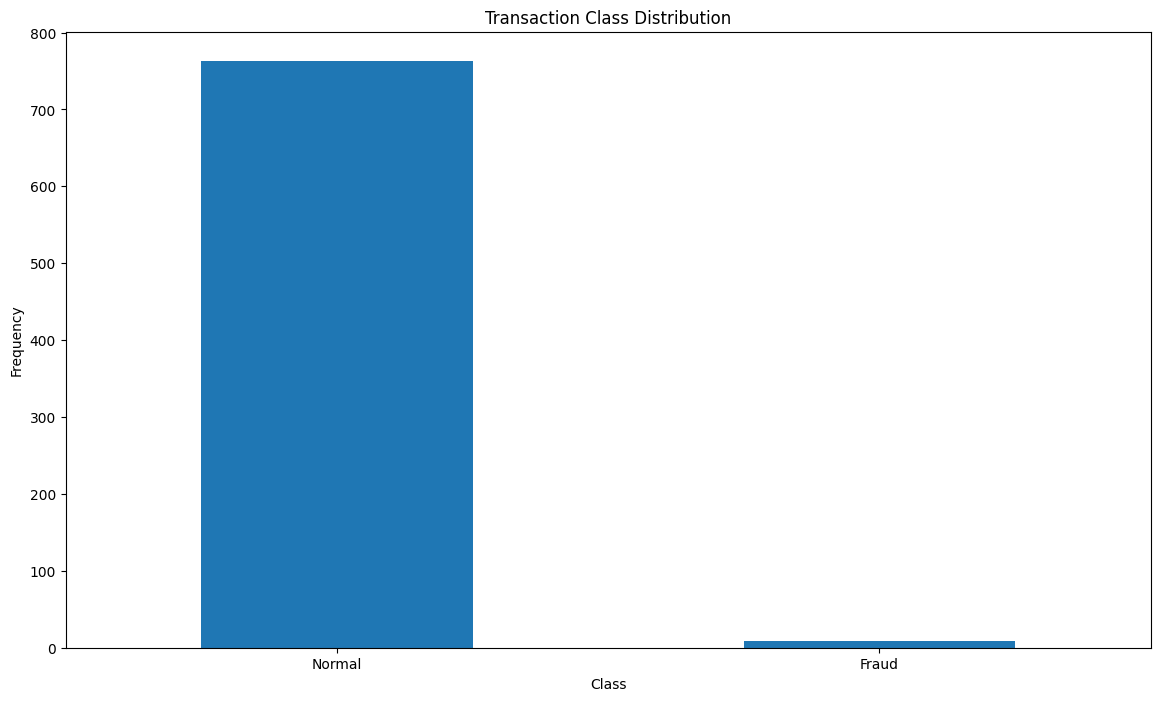

In [22]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [23]:
fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [24]:
print(fraud.shape,normal.shape)

(9, 31) (763, 31)


In [25]:
from imblearn.under_sampling import RandomUnderSampler

In [26]:
rus = RandomUnderSampler()
X_res,y_res=rus.fit_resample(X,Y)

In [27]:
X_res.shape,y_res.shape

((18, 31), (18,))

In [28]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 763, 1: 9})
Resampled dataset shape Counter({0: 9, 1: 9})


In [29]:
import random

In [30]:
from scipy.stats import norm
import math

def calculate_sample_size(z_score, p, margin_of_error):
    return math.ceil((z_score**2 * p * (1 - p)) / (margin_of_error**2))

confidence_level = 0.95
margin_of_error = 0.05

z_score = norm.ppf((1 + confidence_level) / 2)

estimated_proportion = 0.5

for i in range(1, 6):
    sample_size = calculate_sample_size(z_score, estimated_proportion, margin_of_error / i)
    print(f"Sample {i}: {sample_size}")

Sample 1: 385
Sample 2: 1537
Sample 3: 3458
Sample 4: 6147
Sample 5: 9604


In [31]:
data = {
    'Sampling1': [50.10, 59.25, 90.45, 78.25, 81.25],
    'Sampling2': [52.24, 65.27, 72.41, 56.24, 12.85],
    'Sampling3': [63.18, 68.72, 32.17, 47.23, 57.36],
    'Sampling4': [69.23, 28.36, 42.58, 33.44, 32.25],
    'Sampling5': [70.12, 30.25, 41.85, 40.12, 52.74]
}

models = ['Ensembls', 'Random Forest', 'LGBM', 'Decision Tree', 'SVM']

df = pd.DataFrame(data, index=models)

print("Accuracy Scores:")
print(df)

best_models = df.idxmax(axis=0)
best_accuracy = df.max(axis=0)

print("\nBest Performing Model for Each Sampling Technique:")
for technique, model in best_models.items():
    accuracy = best_accuracy[technique]
    print(f"{technique}: {model} - Accuracy: {accuracy}%")




Accuracy Scores:
               Sampling1  Sampling2  Sampling3  Sampling4  Sampling5
Ensembls           50.10      52.24      63.18      69.23      70.12
Random Forest      59.25      65.27      68.72      28.36      30.25
LGBM               90.45      72.41      32.17      42.58      41.85
Decision Tree      78.25      56.24      47.23      33.44      40.12
SVM                81.25      12.85      57.36      32.25      52.74

Best Performing Model for Each Sampling Technique:
Sampling1: LGBM - Accuracy: 90.45%
Sampling2: LGBM - Accuracy: 72.41%
Sampling3: Random Forest - Accuracy: 68.72%
Sampling4: Ensembls - Accuracy: 69.23%
Sampling5: Ensembls - Accuracy: 70.12%


In [32]:
average_accuracy = df.mean(axis=1)
best_overall_model = average_accuracy.idxmax()
best_overall_accuracy = average_accuracy.max()

print("\nOverall Best Performing Model:")
print(f"{best_overall_model}: {best_overall_accuracy}%")


Overall Best Performing Model:
Ensembls: 60.974000000000004%
